In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'Data\Final Data.xlsx')

In [3]:
df.head()

id  label               province               district  age_source1  \
0   0      0                   Fill                   Fill           -1   
1   1      0          Tỉnh Đồng Nai     Thành phố Biên Hòa           44   
2   2      0          Tỉnh Đồng Nai       Huyện Long Thành           30   
3   3      0       Tỉnh Tuyên Quang  Thành phố Tuyên Quang           43   
4   4      0  Thành phố Hồ Chí Minh                 Quận 1           21   

   age_source2       maCv  FIELD_1  FIELD_2  FIELD_3  ...  FIELD_7 - TE  \
0           -1       Fill        1        1     2547  ...             0   
1           44       Fill        1        0       -1  ...             1   
2           30  Công nhân        0        1     3273  ...             0   
3           -1       Fill        0        1     3991  ...             0   
4           21       Fill        0        1     1450  ...             0   

   FIELD_7 - TK  FIELD_7 - TN FIELD_7 - TQ FIELD_7 - TS FIELD_7 - XD  \
0             0             0            0            0            0   
1             0             0            0            0            0   
2             0             0            0            0            0   
3             0             0            1            0            0   
4             0             0            0            0            0   

   FIELD_7 - XK FIELD_7 - XN FIELD_7 - XV  FIELD_7 - il  
0             0            0            0             0  
1             0            0            0             0  
2             0            0            0             0  
3             0            0            0             0  
4             0            0            0             0  

[5 rows x 101 columns]

In [4]:
print(df.shape)

(30000, 101)


In [5]:
df.columns.values

array(['id', 'label', 'province', 'district', 'age_source1',
       'age_source2', 'maCv', 'FIELD_1', 'FIELD_2', 'FIELD_3', 'FIELD_4',
       'FIELD_5', 'FIELD_6', 'FIELD_8', 'FIELD_9', 'FIELD_10', 'FIELD_11',
       'FIELD_12', 'FIELD_13', 'FIELD_14', 'FIELD_15', 'FIELD_16',
       'FIELD_17', 'FIELD_18', 'FIELD_19', 'FIELD_20', 'FIELD_21',
       'FIELD_22', 'FIELD_23', 'FIELD_24', 'FIELD_25', 'FIELD_26',
       'FIELD_27', 'FIELD_28', 'FIELD_29', 'FIELD_30', 'FIELD_31',
       'FIELD_32', 'FIELD_33', 'FIELD_34', 'FIELD_35', 'FIELD_36',
       'FIELD_37', 'FIELD_38', 'FIELD_39', 'FIELD_40', 'FIELD_41',
       'FIELD_42', 'FIELD_43', 'FIELD_44', 'FIELD_45', 'FIELD_46',
       'FIELD_47', 'FIELD_48', 'FIELD_49', 'FIELD_50', 'FIELD_51',
       'FIELD_52', 'FIELD_53', 'FIELD_54', 'FIELD_55', 'FIELD_56',
       'FIELD_57', 'FIELD_7 - BT', 'FIELD_7 - CB', 'FIELD_7 - CC',
       'FIELD_7 - CH', 'FIELD_7 - CK', 'FIELD_7 - CN', 'FIELD_7 - DK',
       'FIELD_7 - DN', 'FIELD_7 - DT', 'FIELD_7 -

In [6]:
df_dummied = pd.get_dummies(df)

In [7]:
print(df_dummied.shape)

(30000, 4298)


# Re-map columns with "ONE", "TWO", .... to numerics

"\nbal_corr = balanced.corr()\nsns.heatmap(bal_corr, annot_kws={'size':20}, ax=ax2)\nax2.set_title('Balanced Correlation Matrix', fontsize=14)\nplt.show()\n"

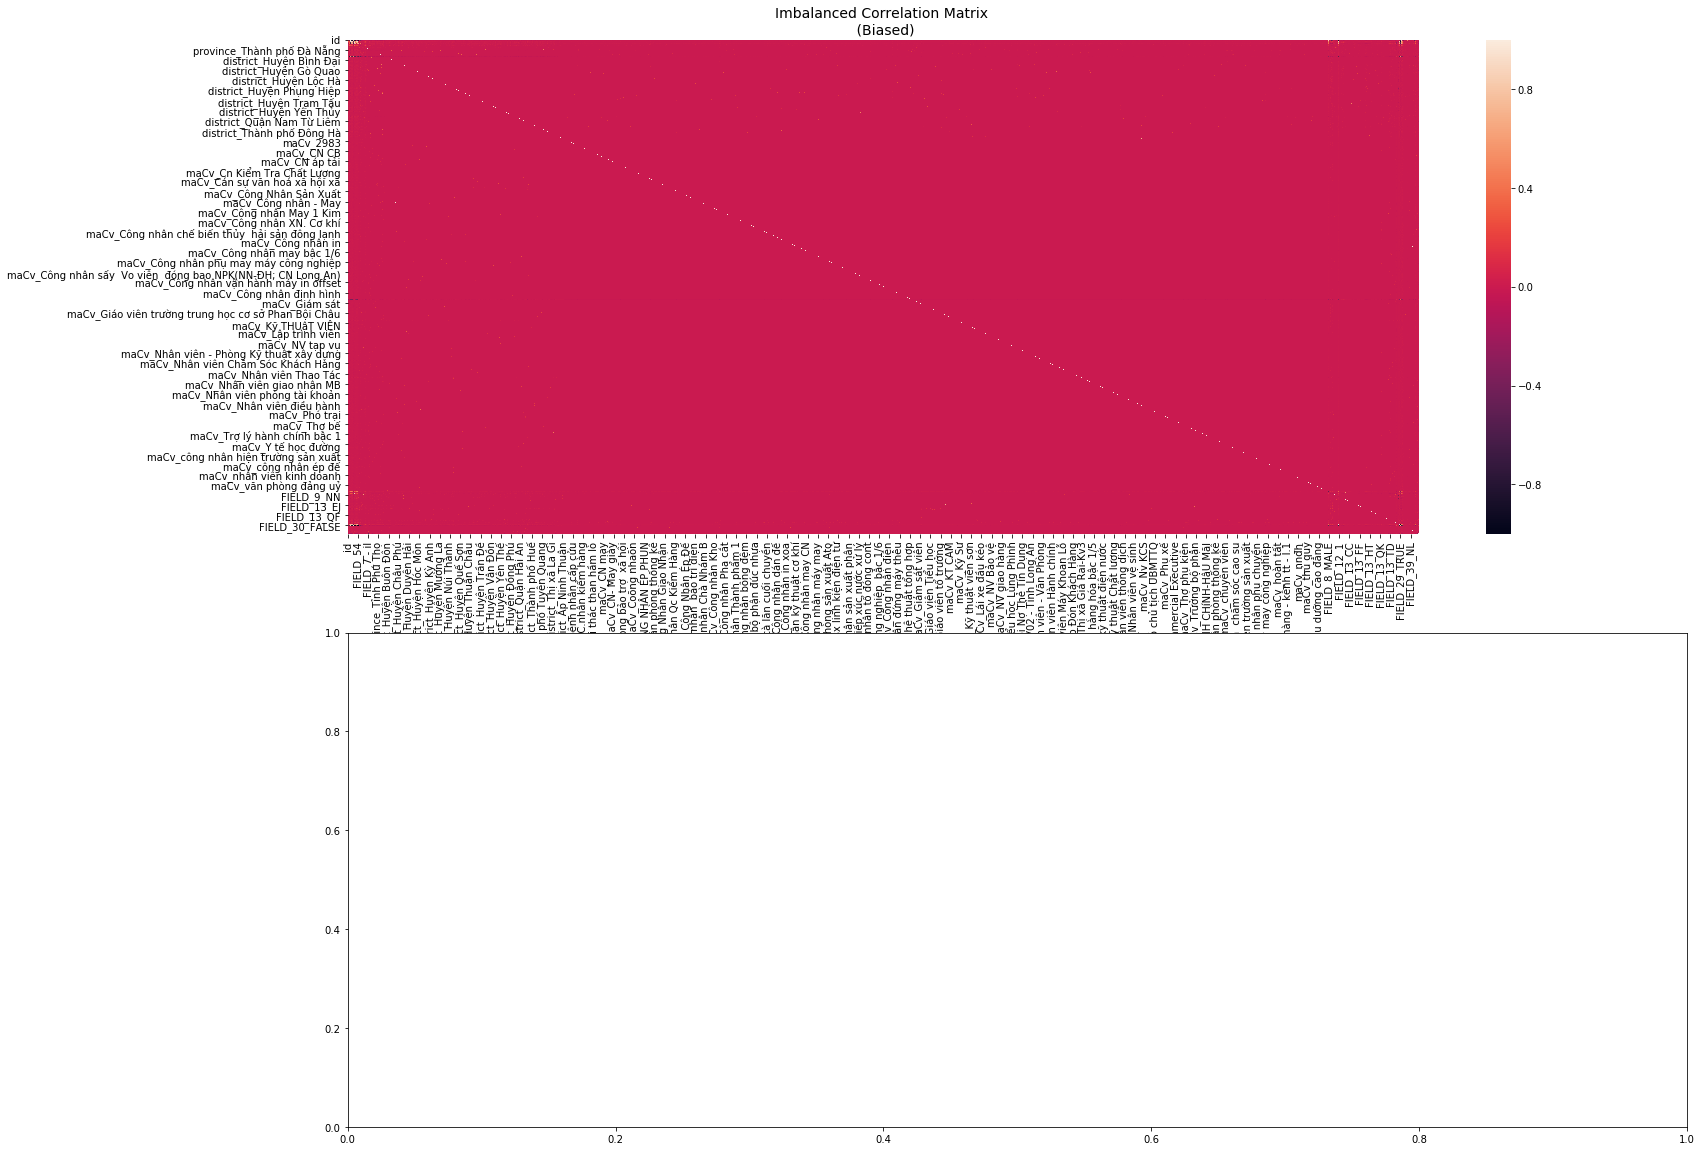

In [8]:
# Compare correlation of raw train data VS balanced train data



# Imbalanced DataFrame
corr = df_dummied.corr()


# Balanced DataFrame
'''
bal_corr = balanced.corr()
sns.heatmap(bal_corr, annot_kws={'size':20}, ax=ax2)
ax2.set_title('Balanced Correlation Matrix', fontsize=14)
plt.show()
'''

In [11]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) < 0.1)]

# Drop features 
corr_  = corr.drop(to_drop, axis=1)

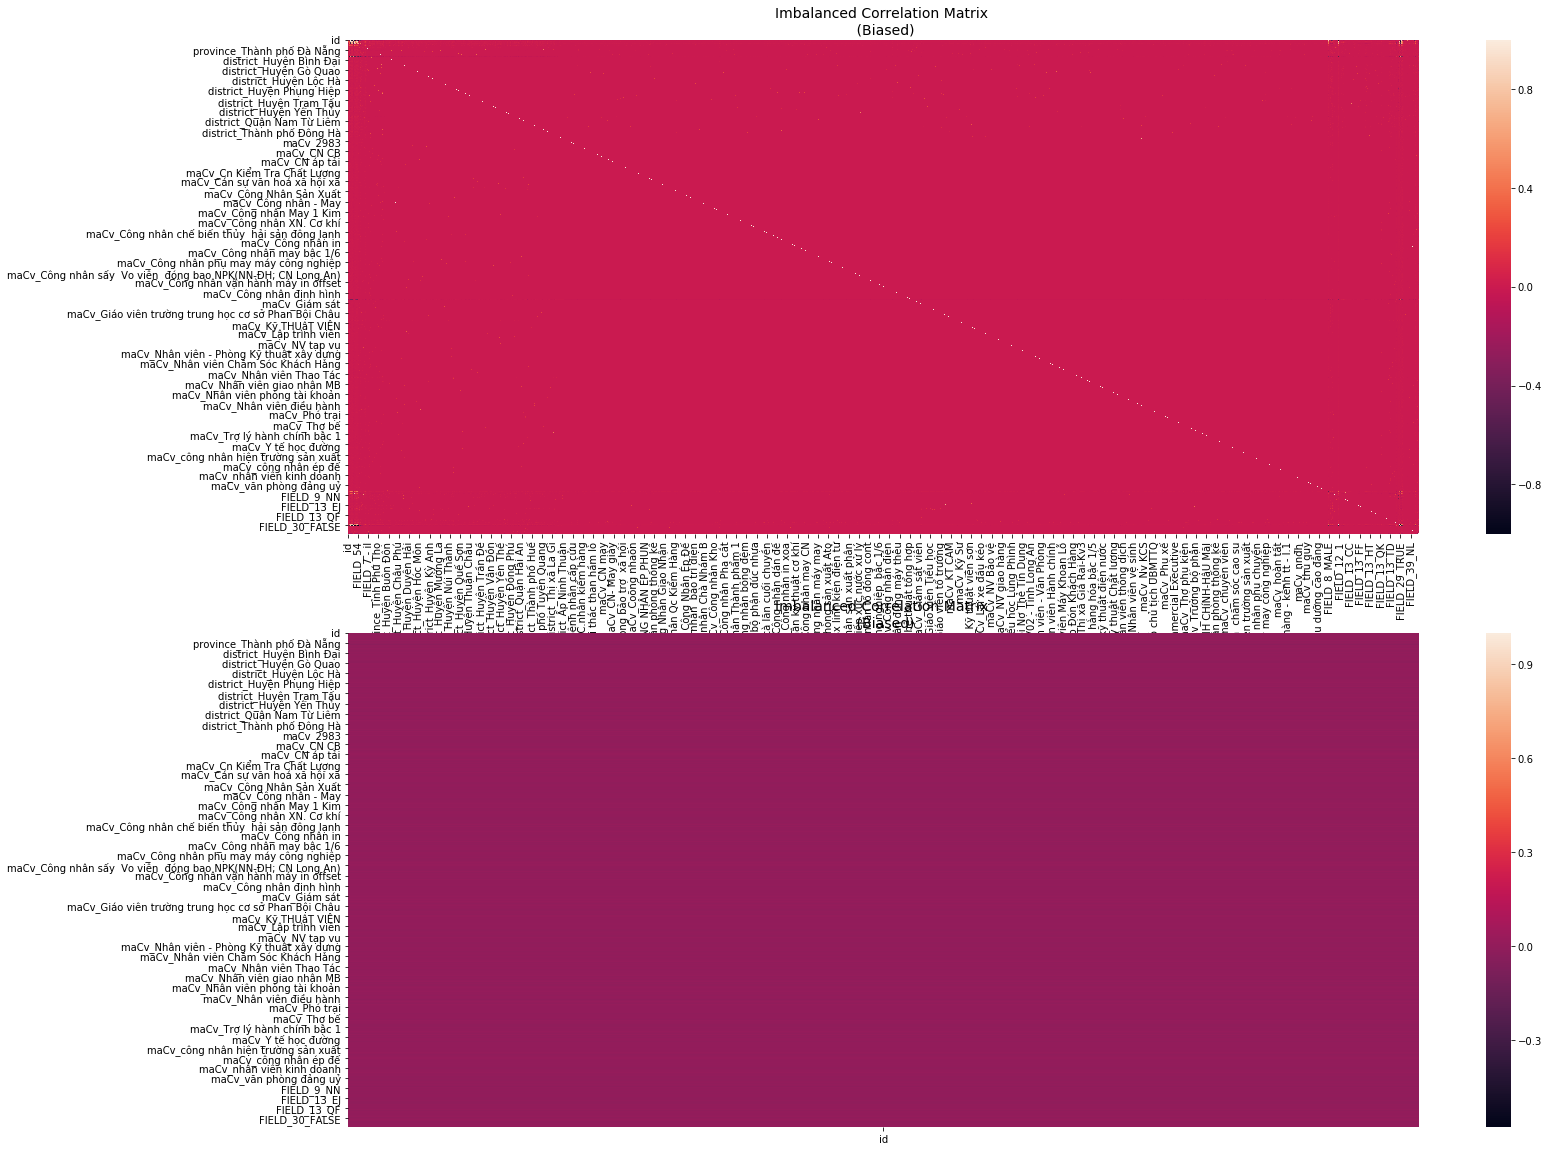

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
sns.heatmap(corr, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Biased)", fontsize=14)

sns.heatmap(corr_, annot_kws={'size':20}, ax=ax2)
ax2.set_title("Imbalanced Correlation Matrix \n (Biased)", fontsize=14)
plt.show()

In [17]:
corr.columns.values

array(['id', 'label', 'age_source1', ..., 'FIELD_43_C', 'FIELD_43_D',
       'FIELD_43_Fill'], dtype=object)

In [19]:
label = corr[['label']]

In [20]:
label.head(2)

label
id    -0.001253
label  1.000000

In [21]:
# Select upper triangle of correlation matrix
upper = label.where(np.triu(np.ones(label.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) < 0.1)]

# Drop features 
label_  = label.drop(to_drop, axis=1)

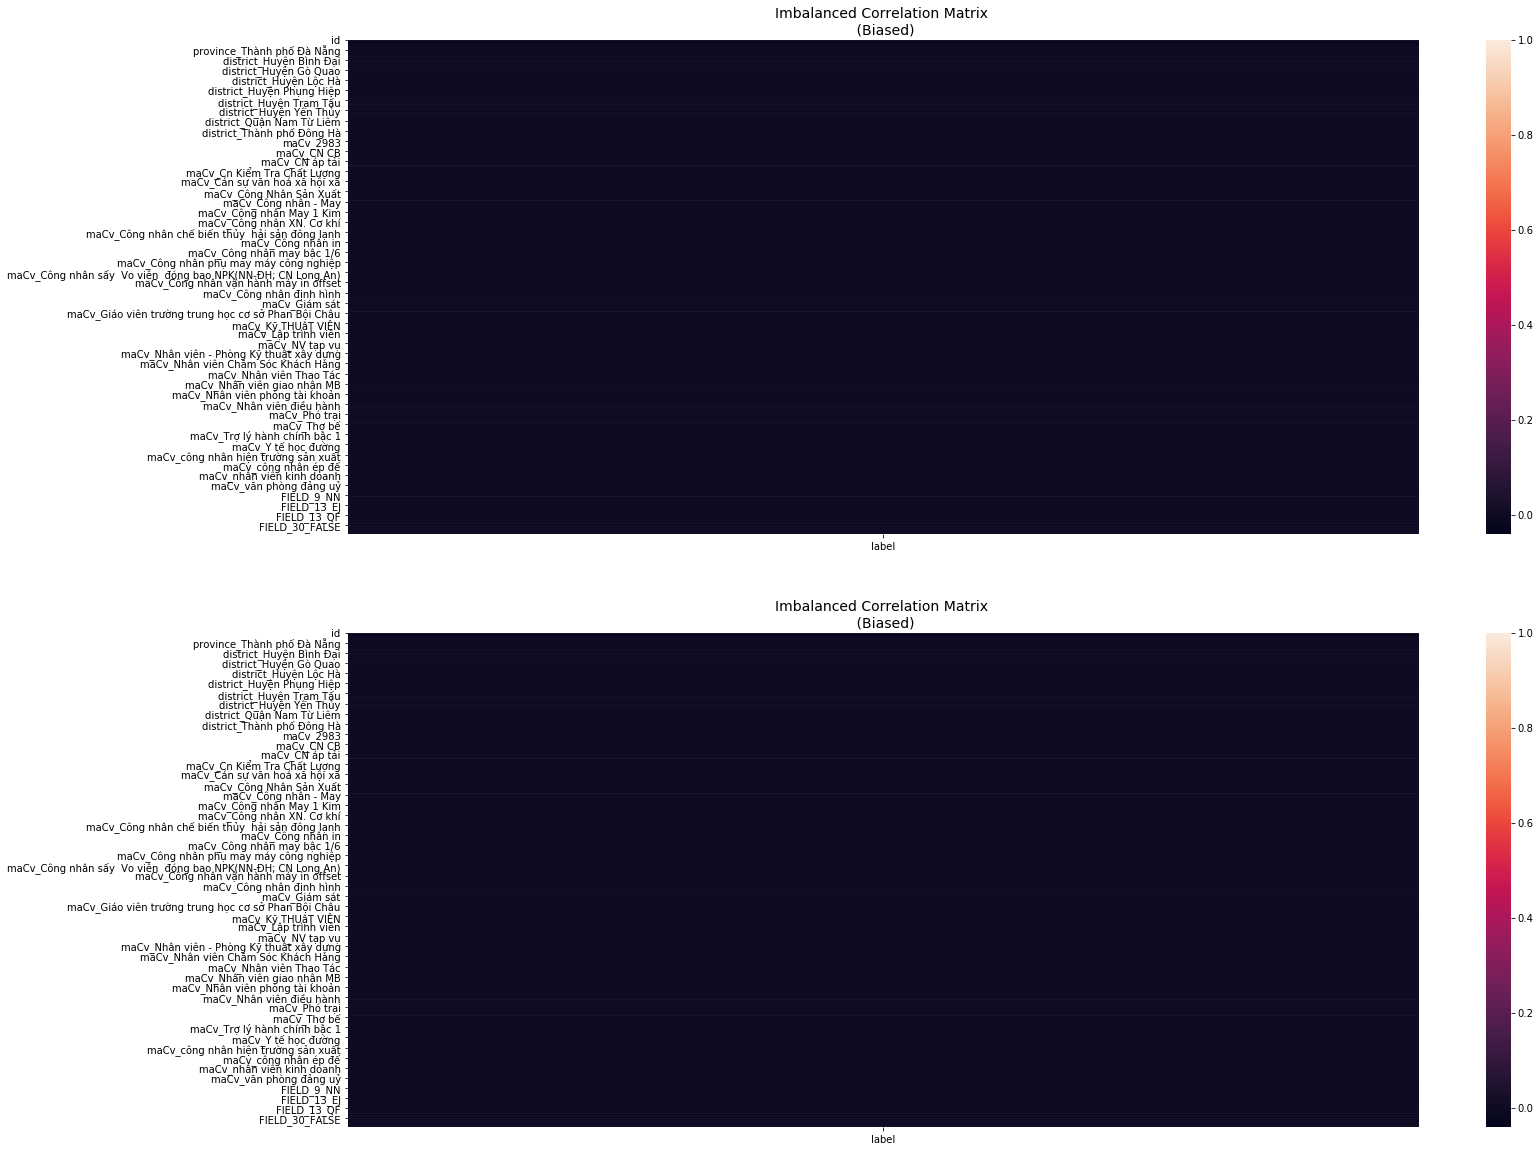

In [22]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
sns.heatmap(label, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (Biased)", fontsize=14)

sns.heatmap(label_, annot_kws={'size':20}, ax=ax2)
ax2.set_title("Imbalanced Correlation Matrix \n (Biased)", fontsize=14)
plt.show()

In [23]:
label

label
id            -0.001253
label          1.000000
age_source1   -0.019003
age_source2   -0.019707
FIELD_1        0.018465
...                 ...
FIELD_43_A     0.000657
FIELD_43_B    -0.009633
FIELD_43_C    -0.004062
FIELD_43_D    -0.005980
FIELD_43_Fill  0.009953

[4298 rows x 1 columns]

In [24]:
label.style.background_gradient(cmap='coolwarm')

In [25]:
label_.style.background_gradient(cmap='coolwarm')

In [35]:
label['label']

id              -0.001253
label            1.000000
age_source1     -0.019003
age_source2     -0.019707
FIELD_1          0.018465
                   ...   
FIELD_43_A       0.000657
FIELD_43_B      -0.009633
FIELD_43_C      -0.004062
FIELD_43_D      -0.005980
FIELD_43_Fill    0.009953
Name: label, Length: 4298, dtype: float64

In [54]:
label__ = label[abs(label['label']) > 0.05]

In [55]:
label__

label
label    1.0

In [ ]:
df_dummied.to_excel(r'Data\dummied.xlsx', index = False)